# Recommendation System with Collaborative Filtering

Course : SNU FIRA Big Data Platform <br>
Class : Data Mining<br>
Professor :  <a href="http://dm.snu.ac.kr">Sung-Zoon Cho</a><br>
Member : Jeong-Myeong Lee, GoEun Yu, Youkyoung Cha


## Project Objective
Developing recommendation system with collborative filtering using KNN(K-Nearest Neighbor) for <a href="https://koreapas.com">Koreapas</a>

## Used Module

Visualization : matplotlib, seaborn<br>
Data representation : pandas <br>
String Processing : re<br>
Numeric Calculation : numpy<br>
Machine Learning : sklearn<br>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import numpy as np
from sklearn.neighbors import NearestNeighbors

%matplotlib inline
plt.rcParams['figure.figsize'] = [18.0, 12.0]

## 1. Preprocessing

### Raw data description
Column 1 : Board tag<br>
Column 2 : Post id<br>
Column 6 : User ids who liked the post<br>


In [4]:
df = pd.read_csv('dq_revolution.csv',header=None,sep = ';',encoding='ANSI')
df

C:\Users\renz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9
0,4,picture,3,",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...",NaN,<36854>,0,0,0
1,5,freebbs,1,NaN,NaN,NaN,<36854>,0,0,0
2,6,freebbs,4,NaN,NaN,NaN,<36854>,0,0,0
3,7,freebbs,5,NaN,NaN,NaN,<36854>,0,0,0
4,8,freebbs,3,NaN,NaN,NaN,<36854>,0,0,0
5,10,freebbs,7,NaN,NaN,NaN,<36854>,0,0,0
6,11,freebbs,6,NaN,NaN,NaN,<36854>,0,0,0
7,12,freebbs,8,NaN,NaN,NaN,<36854>,0,0,0
8,13,freebbs,9,",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...",NaN,<36854>,0,0,0
9,14,freebbs,15,",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...",NaN,NaN,0,0,0


### Build User-Post list
Extract posts on gofun, since Jan 1, 2017

In [ ]:
pd.options.display.max_columns = 12

df = df[df.iloc[:,1] =='gofun']
df = df[df.iloc[:,2] >= 119941]

Turn user ids string into a list

In [5]:
pd.options.display.max_columns=10
df = df.iloc[:,[2,6]]
df.columns = ['post','user']

res = []
for i in range(len(df)):
    try:
        id = re.findall(r'<[\d]+>',df.iloc[i,1])
        res.append(list(map(lambda s: re.sub(r'<|>','',s),id)))
    except:
        res.append([])

df['user_id'] = pd.Series(res,index=df.index)
del df['user']
df

,post,user_id
86579,122047,[]
91484,123764,"[34639, 34469, 87755]"
92476,123767,"[60936, 112772, 68690, 69023, 53594, 34469, 20..."
93078,123765,"[47614, 96405, 24259, 36199, 4656, 11172, 5384..."
93721,123760,"[64750, 34469, 34639, 52867, 19681, 64858, 449..."
93844,123762,"[73012, 34469, 2432, 83398, 31824, 19681, 8459..."
95325,123759,"[34639, 73779, 19082, 34469, 52867, 219, 35928..."
95327,123286,[]
96063,123757,"[76092, 34469, 14580, 19681]"
96229,123758,"[87502, 36737, 3205]"


※ Caution! This will take about 50 minutes at Intel i7 processor environment.<br>
Plot number of likes of each post

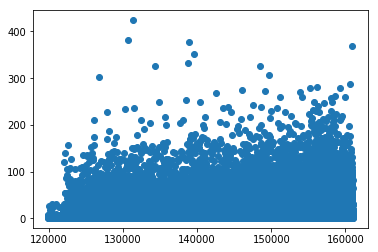

In [6]:
# df.to_csv('post_user.csv')

# data_ = pd.read_csv('post_user.csv',encoding='ANSI')
data_ = df
# del data_['Unnamed: 0']


id_ = []
for x in data_['user_id']:
    id_.append(eval(str(x)))
data_['id_'] = id_

# id length 값을 갖는 id_len column 추가
data_["id_len"] = data_["id_"].apply(lambda x: len(x))

# user와 post를 column으로 갖는 res DataFrame 생성
res = pd.DataFrame()

for k in range(len(data_)):
    for i in range(data_['id_len'].iloc[k]):
        x = [int(data_['id_'].iloc[k][i]), data_['post'].iloc[k]]
        res = res.append([x], ignore_index=True)

res = res.rename(columns={0: 'user', 1: 'column'})
# res.to_csv('user_column.csv', encoding='ANSI')

# df.to_csv('gofun_id.csv')

# df = pd.read_csv('gofun_user_post.csv')
# del df['Unnamed: 0']

new = res[res.column>=119941]

users = set(new.user)
posts = set(new.column)

s_matrix = pd.DataFrame(0,index=users, columns=posts)

for i, j in new.values:
    s_matrix.loc[i,j] += 1

# import pickle
# s_matrix.to_csv('sparse_matrix.csv')

# with open('C:\\Users\\renz\\Desktop\\DM\\sparse_matrix.pkl', 'rb') as file:
#     data = pickle.load(file)

grouped = new.groupby('column').count()

plt.scatter(x = grouped.index,y=grouped.user)

### User-Post list

In [19]:
res

,user,column
0,34639,123764
1,34469,123764
2,87755,123764
3,60936,123767
4,112772,123767
5,68690,123767
6,69023,123767
7,53594,123767
8,34469,123767
9,20374,123767


### Sparse Matrix

In [8]:
matrix = s_matrix
matrix

,131072,131074,131075,131076,131077,...,131067,131068,131069,131070,131071
65537,0,0,0,0,0,...,0,0,0,0,0
98313,0,0,0,0,0,...,0,0,0,0,0
32777,0,0,0,0,0,...,0,0,0,0,0
11,0,0,0,0,0,...,0,0,0,0,0
32778,0,0,0,0,0,...,0,0,0,0,0
32783,0,0,0,0,0,...,0,0,0,0,0
65553,0,0,0,0,0,...,0,0,0,0,0
23,0,0,0,0,0,...,0,0,0,0,0
98330,0,0,0,0,0,...,0,0,0,0,0
131100,0,0,0,0,0,...,0,0,0,0,0


# 2. Visualization

Text(0,0.5,'Post ID')

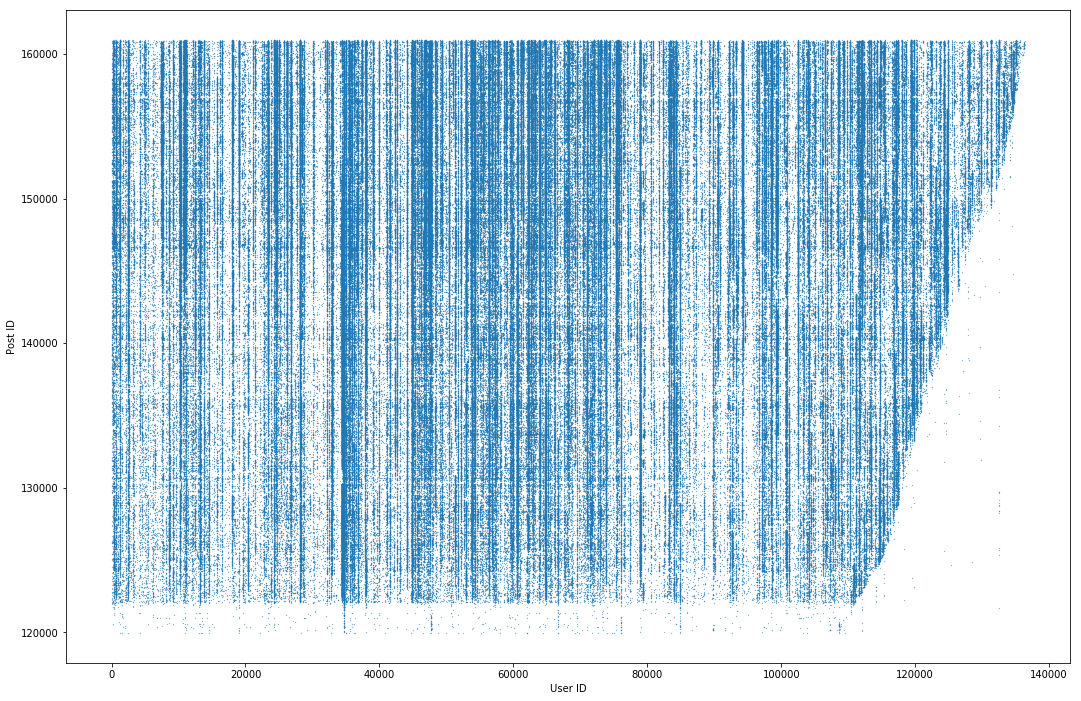

In [16]:
plt.scatter(res['user'], res['column'], s=0.05, marker='o')
plt.xlabel('User ID')
plt.ylabel('Post ID')

<BarContainer object of 35744 artists>

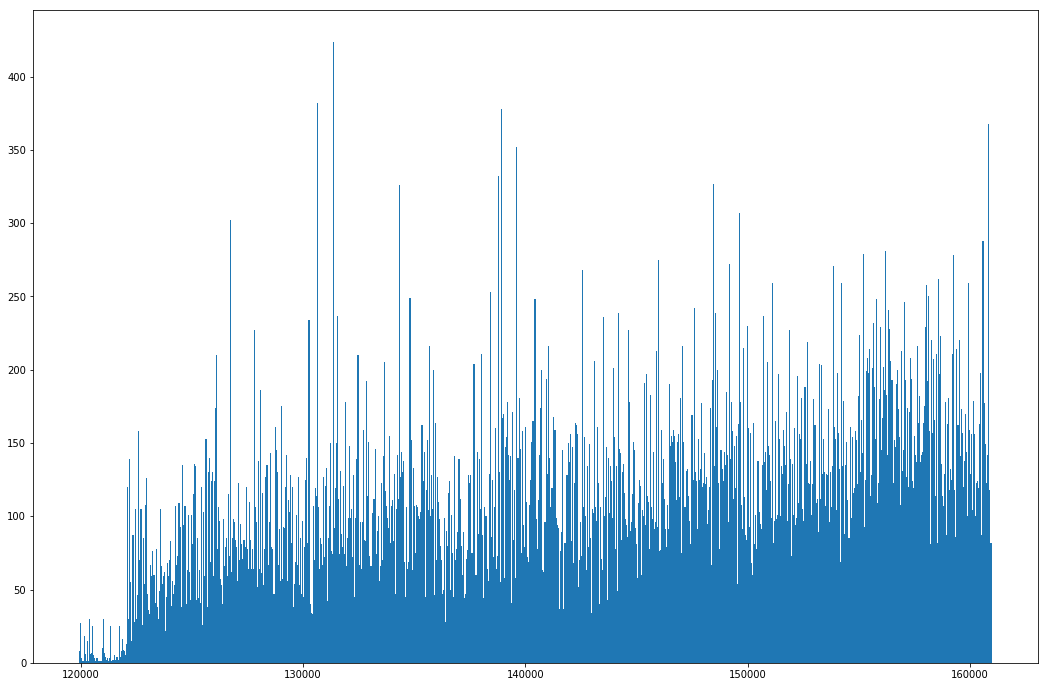

In [38]:
grouped = res.groupby('column').count()

plt.bar(x = grouped.index,height = grouped.user, width =50)
# sns.regplot(data=df, x = '', y=grouped.user)

C:\Users\renz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


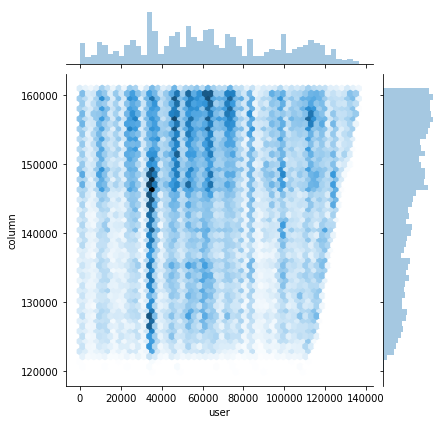

In [14]:
sns.jointplot(res['user'], res['column'], kind='hex')

# 3. Model

### Data description

In [152]:
matrix.sum(axis = 1).describe()

count     3800.000000
mean       194.112895
std        612.872947
min         10.000000
25%         16.000000
50%         35.000000
75%        113.000000
max      15138.000000
dtype: float64

In [9]:
matrix.sum(axis = 0).describe()

count    35744.000000
mean        21.320865
std         28.218350
min          1.000000
25%          5.000000
50%         12.000000
75%         25.000000
max        424.000000
dtype: float64

### Cutting off data to reduce sparcity

In [11]:
df = matrix[matrix.columns[matrix.sum(axis=0) >= 10]]

df1 = df[df.sum(axis = 1) >= 10]
df2 = df[df.sum(axis = 1) >= 10]

## User-User Model

![title](recommendation.jpg)

## Metric selection
Selected jaccard based on hit rate

![title](metric.jpg)


In [12]:
neigh1 = NearestNeighbors(n_neighbors=6, metric='jaccard', n_jobs=4)
neigh1.fit(df)


user = 65526


distance, fellas = neigh1.kneighbors([df.loc[user, :]])

for idx, other in enumerate(df.index[fellas][0]):  
    if other == user:
        continue
    print("<User "+str(other)+">")
    count = 0
    hit = 0
    for i in df.loc[user][df.loc[user]==1].index:
        count +=1
        if i in df.loc[other][df.loc[other]==1]:
            hit += 1
        else:
            pass
    print("Hit rate = "+ str(hit/count))
    print("Distance = "+str(distance[0][idx]))
    print("Total hit = "+ str(hit))
    print("Total recommend = "+ str(count))
    print("")

<User 32235>
Hit rate = 0.301707779886148
Distance = 0.9090128755364807
Total hit = 318
Total recommend = 1054

<User 97059>
Hit rate = 0.2381404174573055
Distance = 0.9097446961524631
Total hit = 251
Total recommend = 1054

<User 108436>
Hit rate = 0.25521821631878555
Distance = 0.9101536406145625
Total hit = 269
Total recommend = 1054

<User 46770>
Hit rate = 0.22960151802656548
Distance = 0.914275593340418
Total hit = 242
Total recommend = 1054

<User 113917>
Hit rate = 0.17077798861480076
Distance = 0.9145704793545325
Total hit = 180
Total recommend = 1054



In [14]:
neigh1 = NearestNeighbors(n_neighbors=6, metric='hamming', n_jobs=4)
neigh1.fit(df)


user = 65526


distance, fellas = neigh1.kneighbors([df.loc[user, :]])

for idx, other in enumerate(df.index[fellas][0]):  
    if other == user:
        continue
    print("<User "+str(other)+">")
    count = 0
    hit = 0
    for i in df.loc[user][df.loc[user]==1].index:
        count +=1
        if i in df.loc[other][df.loc[other]==1]:
            hit += 1
        else:
            pass
    print("Hit rate = "+ str(hit/count))
    print("Distance = "+str(distance[0][idx]))
    print("Total hit = "+ str(hit))
    print("Total recommend = "+ str(count))
    print("")

<User 119666>
Hit rate = 0.0028462998102466793
Distance = 0.05201940209859434
Total hit = 3
Total recommend = 1054

<User 103128>
Hit rate = 0.003795066413662239
Distance = 0.052068897248069686
Total hit = 4
Total recommend = 1054

<User 132693>
Hit rate = 0.0028462998102466793
Distance = 0.052068897248069686
Total hit = 3
Total recommend = 1054

<User 67917>
Hit rate = 0.0028462998102466793
Distance = 0.052068897248069686
Total hit = 3
Total recommend = 1054

<User 80400>
Hit rate = 0.0018975332068311196
Distance = 0.052068897248069686
Total hit = 2
Total recommend = 1054



In [15]:
neigh1 = NearestNeighbors(n_neighbors=6, metric='cosine', n_jobs=4)
neigh1.fit(df)


user = 65526


distance, fellas = neigh1.kneighbors([df.loc[user, :]])

for idx, other in enumerate(df.index[fellas][0]):  
    if other == user:
        continue
    print("<User "+str(other)+">")
    count = 0
    hit = 0
    for i in df.loc[user][df.loc[user]==1].index:
        count +=1
        if i in df.loc[other][df.loc[other]==1]:
            hit += 1
        else:
            pass
    print("Hit rate = "+ str(hit/count))
    print("Distance = "+str(distance[0][idx]))
    print("Total hit = "+ str(hit))
    print("Total recommend = "+ str(count))
    print("")

<User 73779>
Hit rate = 0.444022770398482
Distance = 0.8068832278675964
Total hit = 468
Total recommend = 1054

<User 32235>
Hit rate = 0.301707779886148
Distance = 0.8135205565719436
Total hit = 318
Total recommend = 1054

<User 26216>
Hit rate = 0.3776091081593928
Distance = 0.8189720049650933
Total hit = 398
Total recommend = 1054

<User 44920>
Hit rate = 0.4364326375711575
Distance = 0.8193535785095006
Total hit = 460
Total recommend = 1054

<User 52867>
Hit rate = 0.43738140417457305
Distance = 0.8216793069578838
Total hit = 461
Total recommend = 1054



In [17]:
neigh1 = NearestNeighbors(n_neighbors=6, metric='russellrao', n_jobs=4)
neigh1.fit(df)


user = 65526


distance, fellas = neigh1.kneighbors([df.loc[user, :]])

for idx, other in enumerate(df.index[fellas][0]):  
    if other == user:
        continue
    print("<User "+str(other)+">")
    count = 0
    hit = 0
    for i in df.loc[user][df.loc[user]==1].index:
        count +=1
        if i in df.loc[other][df.loc[other]==1]:
            hit += 1
        else:
            pass
    print("Hit rate = "+ str(hit/count))
    print("Distance = "+str(distance[0][idx]))
    print("Total hit = "+ str(hit))
    print("Total recommend = "+ str(count))

<User 34469>
Hit rate = 0.562618595825427
Distance = 0.9706493763611166
Total hit = 593
Total recommend = 1054

<User 73779>
Hit rate = 0.444022770398482
Distance = 0.9768362700455355
Total hit = 468
Total recommend = 1054

<User 52867>
Hit rate = 0.43738140417457305
Distance = 0.977182736091863
Total hit = 461
Total recommend = 1054

<User 44920>
Hit rate = 0.4364326375711575
Distance = 0.9772322312413384
Total hit = 460
Total recommend = 1054

<User 26216>
Hit rate = 0.3776091081593928
Distance = 0.9803009305088102
Total hit = 398
Total recommend = 1054



## Accuracy Measurement

For each user, delete the latest like history. <br>
Check if the model can predict the post that the user liked most recently.<br>

![title](recommendation2.jpg)

In [237]:
for idx, row in df2.iterrows():
    row[max(row[row==1].index)]=0

In [9]:
k = 6
threshold =0.95


df_test = df2
df_original = df1


neigh = NearestNeighbors(n_neighbors=k, metric='jaccard', n_jobs=4)
neigh.fit(df_test)

true_count = 0
escape = 0
for user, row in df_original.iterrows():
    di, res = neigh.kneighbors([df_test.loc[user]])
    simid = []
    for i in range(k-1):
        if di[0][i] < threshold:
            simid.append(df_test.index[res][0][i+1])
    if not simid:
        escape += 1
        continue
    result = []
    for jj in range(len(simid)):
        if len(result) == 0:
            result = list(df_test.loc[simid[jj]][df_test.loc[simid[jj]] == 1][df_test.loc[user] == 0].index)
        else:
            result.extend(list(df_test.loc[simid[jj]][df_test.loc[simid[jj]] == 1][df_test.loc[user] == 0].index))
        
    yes = pd.Series(result).value_counts()[pd.Series(result).value_counts() == max(pd.Series(result).value_counts())].sort_index(ascending = False).iloc[:5]
    if row[row==1].index[-1] in yes.index:
        true_count+= 1 
    

print("True rate: "+ str(true_count/len(df_original)))
print("True count: "+ str(true_count))
print("Escape rate: " + str(escape))
print("Escape count: " + str(escape/len(df_original)))
print("Total count: " + str(len(df_original)))

True rate: 0.0005434782608695652
True count: 2
Escape rate: 0
Escape count: 0.0
Total count: 3680


## Post-Post Model
Due to extermely low true rate, we changed out approach

![title](recommendation3.jpg)

In [ ]:
df = df.transpose()

neigh1 = NearestNeighbors(n_neighbors=6, metric='jaccard', n_jobs=4)
neigh1.fit(df)

post_id = 131108

distance, fellas = neigh1.kneighbors([df.loc[post_id].values])

for idx, other in enumerate(df.index[fellas][0]):  
    if other == post_id:
        continue
    print("<Post "+str(other)+">")
    count = 0
    hit = 0
    for i in df.loc[post_id][df.loc[post_id]==1].index:
        count +=1
        if i in df.loc[other][df.loc[other]==1]:
            print(str(i)+" "+str(True))
            hit += 1
        else:
            pass
            print(str(i)+" "+str(False))

    print("Distance = "+str(distance[0][idx]))

# 4. Result of Recommendation

![title](example.jpg)
![title](example1.jpg)
![title](example2.jpg)